In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

df = pd.DataFrame.from_csv('train.csv')
dfMain = df.ix[:, ['question1', 'question2', 'is_duplicate']]

In [2]:
display(dfMain.head())

,question1,question2,is_duplicate
id,,,
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
from collections import Counter

def create_lookup_tables(text):
    """
    Create lookup tables for vocabulary
    :param text: The text of tv scripts split into words
    :return: A tuple of dicts (vocab_to_int, int_to_vocab)
    """
    counts = Counter(text)
    
    vocab_tuple_list = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    vocab_to_int = {word_tuple[0]: i for i, word_tuple in enumerate(vocab_tuple_list)}

    int_to_vocab = {integer: word for word, integer in vocab_to_int.items()}
    
    return vocab_to_int, int_to_vocab

In [4]:
def token_lookup():
    """
    Generate a dict to turn punctuation into a token.
    :return: Tokenize dictionary where the key is the punctuation and the value is the token
    """
    
    return {'.': '||period||', ',': '||comma||', '"': '||quotation_mark||', ';': '||semicolon||', '!': '||exclamation_mark||',
           '?': '||question_mark||', '(': '||left_parentheses||', ')': '||right_parentheses||', '--': '||dash||', '\n': '||return||'}

In [5]:
def replace_by_token(s, token_dict):
    updated_s = ''
    
    for char in s:
        if char not in token_dict:
            updated_s += char
        else:
            updated_s += ' ' + token_dict[char] + ' '
    
    return updated_s

In [6]:
from functools import partial

partial_replace = partial(replace_by_token, token_dict=token_lookup())

In [7]:
dfMain['question1'] = dfMain['question1'].astype(str)
dfMain['question2'] = dfMain['question2'].astype(str)

dfMain.ix[:, 'question1'] = dfMain.ix[:, 'question1'].apply(partial_replace)
dfMain.ix[:, 'question2'] = dfMain.ix[:, 'question2'].apply(partial_replace)

In [8]:
pd.set_option('display.max_colwidth', -1)

dfMain.head()

,question1,question2,is_duplicate
id,,,
0,What is the step by step guide to invest in share market in india ||question_mark||,What is the step by step guide to invest in share market ||question_mark||,0
1,What is the story of Kohinoor ||left_parentheses|| Koh-i-Noor ||right_parentheses|| Diamond ||question_mark||,What would happen if the Indian government stole the Kohinoor ||left_parentheses|| Koh-i-Noor ||right_parentheses|| diamond back ||question_mark||,0
2,How can I increase the speed of my internet connection while using a VPN ||question_mark||,How can Internet speed be increased by hacking through DNS ||question_mark||,0
3,Why am I mentally very lonely ||question_mark|| How can I solve it ||question_mark||,Find the remainder when [math]23^{24}[/math] is divided by 24 ||comma|| 23 ||question_mark||,0
4,Which one dissolve in water quikly sugar ||comma|| salt ||comma|| methane and carbon di oxide ||question_mark||,Which fish would survive in salt water ||question_mark||,0


In [9]:
dfTest = pd.DataFrame.from_csv('test.csv')

In [10]:
dfTest.head()

,question1,question2
test_id,,
0,How does the Surface Pro himself 4 compare with iPad Pro?,Why did Microsoft choose core m3 and not core i3 home Surface Pro 4?
1,Should I have a hair transplant at age 24? How much would it cost?,How much cost does hair transplant require?
2,What but is the best way to send money from China to the US?,What you send money to China?
3,Which food not emulsifiers?,What foods fibre?
4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [11]:
dfTest['question1'] = dfTest['question1'].astype(str)
dfTest['question2'] = dfTest['question2'].astype(str)

dfTest.ix[:, 'question1'] = dfTest.ix[:, 'question1'].apply(partial_replace)
dfTest.ix[:, 'question2'] = dfTest.ix[:, 'question2'].apply(partial_replace)

In [12]:
dfTest.head()

,question1,question2
test_id,,
0,How does the Surface Pro himself 4 compare with iPad Pro ||question_mark||,Why did Microsoft choose core m3 and not core i3 home Surface Pro 4 ||question_mark||
1,Should I have a hair transplant at age 24 ||question_mark|| How much would it cost ||question_mark||,How much cost does hair transplant require ||question_mark||
2,What but is the best way to send money from China to the US ||question_mark||,What you send money to China ||question_mark||
3,Which food not emulsifiers ||question_mark||,What foods fibre ||question_mark||
4,How ||quotation_mark|| aberystwyth ||quotation_mark|| start reading ||question_mark||,How their can I start reading ||question_mark||


In [13]:
all_sentences = dfMain['question1'].tolist() + dfTest['question1'].tolist() + dfMain['question2'].tolist() + dfTest['question2'].tolist()
word_list = list(map(str.split, all_sentences))

In [14]:
print(word_list[:20])

[['What', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'market', 'in', 'india', '||question_mark||'], ['What', 'is', 'the', 'story', 'of', 'Kohinoor', '||left_parentheses||', 'Koh-i-Noor', '||right_parentheses||', 'Diamond', '||question_mark||'], ['How', 'can', 'I', 'increase', 'the', 'speed', 'of', 'my', 'internet', 'connection', 'while', 'using', 'a', 'VPN', '||question_mark||'], ['Why', 'am', 'I', 'mentally', 'very', 'lonely', '||question_mark||', 'How', 'can', 'I', 'solve', 'it', '||question_mark||'], ['Which', 'one', 'dissolve', 'in', 'water', 'quikly', 'sugar', '||comma||', 'salt', '||comma||', 'methane', 'and', 'carbon', 'di', 'oxide', '||question_mark||'], ['Astrology:', 'I', 'am', 'a', 'Capricorn', 'Sun', 'Cap', 'moon', 'and', 'cap', 'rising', '||period||', '||period||', '||period||', 'what', 'does', 'that', 'say', 'about', 'me', '||question_mark||'], ['Should', 'I', 'buy', 'tiago', '||question_mark||'], ['How', 'can', 'I', 'be', 'a', 'good', 'geo

In [15]:
import itertools
from nltk.corpus import stopwords

# stops = set(stopwords.words("english"))

word_list = list(itertools.chain.from_iterable(word_list))
word_list = [word.lower() for word in word_list]
# word_list = [word for word in word_list if word not in stops]

In [16]:
from collections import Counter

def create_lookup_tables(list_of_words):
    """
    Create lookup tables for vocabulary
    :param text: The text of tv scripts split into words
    :return: A tuple of dicts (vocab_to_int, int_to_vocab)
    """
    counts = Counter(list_of_words)
    
    vocab_tuple_list = sorted(counts.items(), key=lambda x: x[1], reverse=True)
#     vocab_tuple_list = [tp for tp in vocab_tuple_list if tp[1] > 1]
    
    vocab_to_int = {word_tuple[0]: i for i, word_tuple in enumerate(vocab_tuple_list)}
    vocab_to_int['<GO>'] = len(vocab_to_int)
    vocab_to_int['<EOS>'] = len(vocab_to_int)
    vocab_to_int['<PAD>'] = len(vocab_to_int)
    vocab_to_int['<UNK>'] = len(vocab_to_int)
    
    int_to_vocab = {integer: word for word, integer in vocab_to_int.items()}
    
    return vocab_to_int, int_to_vocab

In [17]:
vocab_to_int, int_to_vocab = create_lookup_tables(word_list)

In [18]:
def word_list_to_lower(word_list):
    return list(map(str.lower, word_list))

def word_list_to_int(word_list, vocab_to_int_dict):
    return list(map(vocab_to_int_dict.get, word_list))

def string_to_int_and_pad(q1_batch, q2_batch, vocab_to_int_dict):
    """
    Pad sentence with <PAD> id
    """
    q1_list = [sentence.split() for sentence in q1_batch]
    q2_list = [sentence.split() for sentence in q2_batch]
    
    q1_list = list(map(word_list_to_lower, q1_list))
    q2_list = list(map(word_list_to_lower, q2_list))
    
    word_list_to_int_partial = partial(word_list_to_int, vocab_to_int_dict=vocab_to_int_dict)
    
    q1_int_list = list(map(word_list_to_int_partial, q1_list))
    q2_int_list = list(map(word_list_to_int_partial, q2_list))
    
    max_q1 = max([len(sentence) for sentence in q1_int_list])
    max_q2 = max([len(sentence) for sentence in q2_int_list])
    max_sentence_length = max(max_q1, max_q2)
    
    q1_int_list_padded = [sentence + [vocab_to_int_dict['<PAD>']] * (max_sentence_length - len(sentence)) for sentence in q1_int_list]
    q2_int_list_padded = [sentence + [vocab_to_int_dict['<PAD>']] * (max_sentence_length - len(sentence)) for sentence in q2_int_list]
    
    return q1_int_list_padded, q2_int_list_padded

In [19]:
X, y = dfMain.ix[:, ['question1', 'question2']], dfMain.ix[:, 'is_duplicate']

In [20]:
q1, q2 = string_to_int_and_pad(X['question1'], X['question2'], vocab_to_int)
q1, q2 = np.array(q1), np.array(q2)

In [21]:
y = np.array(y.tolist())

In [22]:
# Number of Epochs
epochs = 100
# Batch Size
batch_size = 32
# RNN Size
rnn_size = 200 
# Number of Layers
num_layers = 1
# Embedding Size
embedding_size = 512
# Learning Rate
learning_rate = 0.0001
# Dropout Keep Probability
keep_probability = 0.5
max_sentence_length = max(max([len(sentence) for sentence in q1]), max([len(sentence) for sentence in q2]))

In [26]:
import tensorflow as tf
from keras.layers import Input, Embedding, LSTM, Dense, Lambda, Merge, Dropout
from keras.models import Model, Sequential
from keras.layers import merge, concatenate
from keras.layers.wrappers import TimeDistributed
import keras.backend as K
from keras.layers.normalization import BatchNormalization
from keras.layers.recurrent import LSTM
from keras.layers.advanced_activations import ELU

Q1 = Sequential()
Q1.add(Embedding(input_dim=len(vocab_to_int), output_dim=embedding_size, input_length=max_sentence_length))
# Q1.add(LSTM(units=rnn_size, dropout=0.5))
Q1.add(TimeDistributed(Dense(embedding_size, activation='elu')))
# Q1.add(TimeDistributed(LSTM(units=embedding_size, dropout=0.5)))
Q1.add(Lambda(lambda x: K.max(x, axis=1), output_shape=(embedding_size, )))

Q2 = Sequential()
Q2.add(Embedding(input_dim=len(vocab_to_int), output_dim=embedding_size, input_length=max_sentence_length))
# Q2.add(LSTM(units=rnn_size, dropout=0.5))
Q2.add(TimeDistributed(Dense(embedding_size, activation='elu')))
# Q2.add(TimeDistributed(LSTM(units=embedding_size, dropout=0.5)))
Q2.add(Lambda(lambda x: K.max(x, axis=1), output_shape=(embedding_size, )))

model = Sequential()
model.add(Merge([Q1, Q2], mode='concat'))
model.add(BatchNormalization())

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dropout(0.7))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dropout(0.6))
    
model.add(Dense(256))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dropout(0.6))

model.add(Dense(128, activation='elu'))
model.add(Dense(1, activation='sigmoid'))

/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/ipykernel/__main__.py:26: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


In [27]:
from keras.callbacks import EarlyStopping

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

earlyStopping=EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')

history = model.fit([q1, q2], y,
          epochs=epochs, batch_size=batch_size, callbacks=[earlyStopping], validation_split=0.1)

Train on 363861 samples, validate on 40429 samples
Epoch 1/100


ResourceExhaustedError: OOM when allocating tensor with shape[179862,512]
	 [[Node: mul_217 = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"](sub_134, mul_217/y)]]

Caused by op 'mul_217', defined at:
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-27-4e508c4a8681>", line 10, in <module>
    epochs=epochs, batch_size=batch_size, callbacks=[earlyStopping], validation_split=0.1)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/keras/models.py", line 856, in fit
    initial_epoch=initial_epoch)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/keras/engine/training.py", line 1481, in fit
    self._make_train_function()
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/keras/engine/training.py", line 1013, in _make_train_function
    self.total_loss)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/keras/optimizers.py", line 398, in get_updates
    m_t = (self.beta_1 * m) + (1. - self.beta_1) * g
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py", line 794, in binary_op_wrapper
    return func(x, y, name=name)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/tensorflow/python/ops/math_ops.py", line 1015, in _mul_dispatch
    return gen_math_ops._mul(x, y, name=name)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/tensorflow/python/ops/gen_math_ops.py", line 1625, in _mul
    result = _op_def_lib.apply_op("Mul", x=x, y=y, name=name)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[179862,512]
	 [[Node: mul_217 = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"](sub_134, mul_217/y)]]


dict_keys(['loss', 'acc', 'val_acc', 'val_loss'])


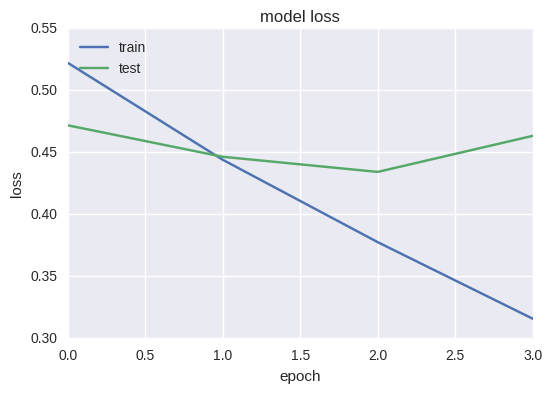

In [25]:
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
def model_inputs():
    """
    Create TF Placeholders for input, targets, and learning rate.
    :return: Tuple (input, targets, learning rate, keep probability)
    """
    input1 = tf.placeholder(dtype=tf.int32, shape=(None, None), name='input1')
    input2 = tf.placeholder(dtype=tf.int32, shape=(None, None), name='input2')
    labels = tf.placeholder(dtype=tf.int32, name='label')
    
    learning_rate = tf.placeholder(dtype=tf.float32, name='learning_rate')
    keep_prob = tf.placeholder(dtype=tf.float32, name='keep_prob')
    
    
    return input1, input2, labels, learning_rate, keep_prob

In [19]:
def encoding_layer(rnn_inputs, rnn_size, num_layers, keep_prob):
    """
    Create encoding layer
    :param rnn_inputs: Inputs for the RNN
    :param rnn_size: RNN Size
    :param num_layers: Number of layers
    :param keep_prob: Dropout keep probability
    :return: RNN state
    """
        
    lstm = tf.contrib.rnn.BasicLSTMCell(rnn_size, state_is_tuple=True) # rnn_size -> # h_dim/C_dim
    
    # Add dropout to the cell
    drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob)

    # Stack up multiple LSTM layers, for deep learning
    cell = tf.contrib.rnn.MultiRNNCell([drop] * num_layers, state_is_tuple=True)
    
    outputs, final_state = tf.nn.dynamic_rnn(cell, rnn_inputs, dtype=tf.float32)

    return final_state


In [20]:
def seq2seq_model(input_data1, input_data2, labels, keep_prob, vocab_size,
                  embedding_size, rnn_size, num_layers):
    """
    Build the Sequence-to-Sequence part of the neural network
    :param input_data: Input placeholder
    :param target_data: Target placeholder
    :param keep_prob: Dropout keep probability placeholder
    :param batch_size: Batch Size
    :param sequence_length: Sequence Length
    :param source_vocab_size: Source vocabulary size
    :param target_vocab_size: Target vocabulary size
    :param enc_embedding_size: Decoder embedding size
    :param dec_embedding_size: Encoder embedding size
    :param rnn_size: RNN Size
    :param num_layers: Number of layers
    :param target_vocab_to_int: Dictionary to go from the target words to an id
    :return: Tuple of (Training Logits, Inference Logits)
    """
    with tf.variable_scope('lstm1'):
        embeddings1 = tf.Variable(tf.truncated_normal((vocab_size, embedding_size)))
        embed_input1 = tf.nn.embedding_lookup(embeddings1, input_data1)
        encoder_state1 = encoding_layer(embed_input1, rnn_size, num_layers, keep_prob)
        
    with tf.variable_scope('lstm2'):
        embeddings2 = tf.Variable(tf.truncated_normal((vocab_size, embedding_size)))
        embed_input2 = tf.nn.embedding_lookup(embeddings2, input_data2)
        encoder_state2 = encoding_layer(embed_input2, rnn_size, num_layers, keep_prob)
    
    normalize_encoder1 = tf.nn.l2_normalize(encoder_state1, 1)        
    normalize_encoder2 = tf.nn.l2_normalize(encoder_state2, 1)
    
    cosine_similarity = tf.multiply(normalize_encoder1, normalize_encoder2)
    
    cost = tf.nn.softmax_cross_entropy_with_logits(logits=encoder_state1, labels=labels)
    
    return cost


In [23]:
X.head()

,question1,question2
id,,
0,What is the step by step guide to invest in share market in india ||question_mark||,What is the step by step guide to invest in share market ||question_mark||
1,What is the story of Kohinoor ||left_parentheses|| Koh-i-Noor ||right_parentheses|| Diamond ||question_mark||,What would happen if the Indian government stole the Kohinoor ||left_parentheses|| Koh-i-Noor ||right_parentheses|| diamond back ||question_mark||
2,How can I increase the speed of my internet connection while using a VPN ||question_mark||,How can Internet speed be increased by hacking through DNS ||question_mark||
3,Why am I mentally very lonely ||question_mark|| How can I solve it ||question_mark||,Find the remainder when [math]23^{24}[/math] is divided by 24 ||comma|| 23 ||question_mark||
4,Which one dissolve in water quikly sugar ||comma|| salt ||comma|| methane and carbon di oxide ||question_mark||,Which fish would survive in salt water ||question_mark||


In [26]:
y[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [28]:
max_sentence_length = max(max([len(sentence) for sentence in q1]), max([len(sentence) for sentence in q2]))

# train_graph = tf.Graph()
# with train_graph.as_default():  
#     input1, input2, labels, lr, keep_prob = model_inputs()
#     sequence_length = tf.placeholder_with_default(max_sentence_length, None, name='sequence_length')
#     input1_shape = tf.shape(input1)
#     input2_shape = tf.shape(input2)
    
#     train_logits, inference_logits = seq2seq_model(
#         tf.reverse(input_data, [-1]), targets, keep_prob, batch_size, sequence_length, len(source_vocab_to_int), len(target_vocab_to_int),
#         encoding_embedding_size, decoding_embedding_size, rnn_size, num_layers, target_vocab_to_int)

#     tf.identity(inference_logits, 'logits')
#     with tf.name_scope("optimization"):
#         # Loss function
#         cost = tf.contrib.seq2seq.sequence_loss(
#             train_logits,
#             targets,
#             tf.ones([input_shape[0], sequence_length]))

#         # Optimizer
#         optimizer = tf.train.AdamOptimizer(lr)

#         # Gradient Clipping
#         gradients = optimizer.compute_gradients(cost)
#         capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients if grad is not None]
#         train_op = optimizer.apply_gradients(capped_gradients)

In [58]:
def batch_data(source1, source2, target, batch_size, vocab_to_int_dict):
    """
    Batch source and target together
    """
    for batch_i in range(0, len(source1)//batch_size):
        start_i = batch_i * batch_size
        source_batch1, source_batch2 = string_to_int_and_pad(source1[start_i:start_i + batch_size], source2[start_i:start_i + batch_size], vocab_to_int_dict)
        target_batch = target[start_i:start_i + batch_size]
        
        yield source_batch1, source_batch2, target_batch

In [ ]:
import tensorflow as tf
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model
from keras.layers import merge, concatenate

input1 = Input(shape=(max_sentence_length,), dtype='int32', name='input1')
embed1 = Embedding(output_dim=embedding_size, input_dim=len(vocab_to_int), input_length=max_sentence_length)(input1)
lstm_out1 = LSTM(units=rnn_size, dropout=1-keep_probability)(embed1)

input2 = Input(shape=(max_sentence_length,), dtype='int32', name='input2')
embed2 = Embedding(output_dim=embedding_size, input_dim=len(vocab_to_int), input_length=max_sentence_length)(input2)
lstm_out2 = LSTM(units=rnn_size, dropout=1-keep_probability)(embed2)

# cosine = merge([lstm_out1, lstm_out2], mode='dot', dot_axes=(1, 1), name='output')
# cosine = merge([lstm_out1, lstm_out2], mode='cos', dot_axes=1)
concat = concatenate([lstm_out1, lstm_out2])
fc1 = Dense(rnn_size, activation='relu')(concat)
fc2 = Dense(int(rnn_size / 2), activation='relu')(fc1)

predictions = Dense(1, activation='sigmoid', name='output')(fc2)

model = Model(inputs=[input1, input2], outputs=predictions)

model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit({'input1': q1, 'input2': q2},
          {'output': y},
          epochs=epochs, batch_size=batch_size, validation_split=0.1)

Train on 363861 samples, validate on 40429 samples
Epoch 1/10
 16448/363861 [>.............................] - ETA: 9452s - loss: 0.2357 - acc: 0.6253 

In [64]:
import tensorflow as tf
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model
from keras.layers import merge, concatenate
import numpy as np

input1 = Input(shape=(3,), dtype='float32', name='input1')
input2 = Input(shape=(3,), dtype='float32', name='input2')

cosine = merge([input1, input2], mode='cos', dot_axes=1)
concat = concatenate([input1, input2])

model = Model(inputs=[input1, input2], outputs=concat)


vec1 = np.array([[1, 2, 3], [3, 2, 1]])
vec2 = np.array([[1, 2, 3], [-10, 1, 1]])

model.compile(optimizer='adam', loss='categorical_crossentropy')
model.predict({'input1': vec1, 'input2': vec2})

/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/home/calvinjku/anaconda3/envs/kaggle/lib/python3.5/site-packages/keras/legacy/layers.py:460: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


array([[  1.,   2.,   3.,   1.,   2.,   3.],
       [  3.,   2.,   1., -10.,   1.,   1.]], dtype=float32)